In [1]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree


In [2]:
df = pd.read_csv('covid_clinical_data.csv')

In [3]:
# grabbing all columns 
my_list = df.columns.values.tolist()

In [4]:
# # selecting all rows and 4th column onwards. columns 0-3 does not provide necessary data for ML
# selected = df.iloc[:,4:]
# selected

In [5]:
# filling null cells with values 0
df = df.fillna(0.0)
df.head()

,ID,Country,Province/State,sample pop,Positive/negative cases,Age,gender,Smoking history,Obesity,Any Comorbidity,...,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste,Asymptomatic,Mortality
0,8,Italy,Nationwide,3200,Positive,82,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,8,Italy,Nationwide,3200,Positive,86,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,8,Italy,Nationwide,3200,Positive,81,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,8,Italy,Nationwide,3200,Positive,78,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,8,Italy,Nationwide,3200,Positive,71,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [6]:
# filtering for columns with adequate data. 
df.sum(axis = 0, skipna = True) 

ID                                                                                  324161
Country                                  ItalyItalyItalyItalyItalyItalyItalyItalyItalyI...
sample pop                                                                        11339844
Positive/negative cases                  PositivePositivePositivePositivePositivePositi...
Age                                                                                 359946
gender                                                                                3242
Smoking history                                                                      242.0
Obesity                                                                              140.0
Any Comorbidity                                                                     3374.0
Hypertension                                                                        3218.0
Diabetes                                                                            1599.0

In [7]:
# dropping columns that are vague or lacking data (<100 cells)
dropped_df = df.drop(['Obesity', 'Any Comorbidity','temp','Loss of smell/taste','Asymptomatic','Chest Pain','Upper air-way congestion','Respiratory rate > 24 breaths per min','Cerebrovascular Disease'], axis=1)

In [8]:
# renaming columns
# master df
dropped_df.rename(columns={"Fever (temperature ‚â•37¬∑3¬∞C)": "Fever", "Diarrhoea": "Diarrhea"})


,ID,Country,Province/State,sample pop,Positive/negative cases,Age,gender,Smoking history,Hypertension,Diabetes,...,Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Mortality
0,8,Italy,Nationwide,3200,Positive,82,1,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,8,Italy,Nationwide,3200,Positive,86,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,8,Italy,Nationwide,3200,Positive,81,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,8,Italy,Nationwide,3200,Positive,78,1,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,8,Italy,Nationwide,3200,Positive,71,1,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,240,USA,Washington,57,Positive,81,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4911,241,USA,Washington,57,Positive,69,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4912,242,USA,Washington,57,Positive,72,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4913,243,USA,Washington,57,Positive,85,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


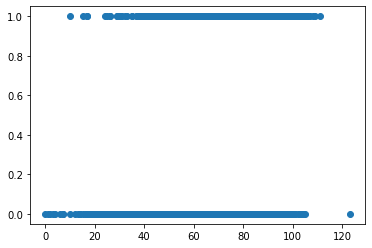